# Data Scraping

In [1]:
#Installing useful lbraries
!pip install selenium
!apt-get update # to update ubuntu to correctly run apt install
!apt install chromium-chromedriver
!cp /usr/lib/chromium-browser/chromedriver /usr/bin
import sys
sys.path.insert(0,'/usr/lib/chromium-browser/chromedriver')

     |████████████████████████████████| 911kB 5.7MB/s 
Get:1 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:2 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Ign:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Hit:4 http://archive.ubuntu.com/ubuntu bionic InRelease
Ign:5 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:6 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:7 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:8 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:9 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease [15.9 kB]
Get:10 http://archive.ubuntu.com/ubuntu bionic-backports InRelease [74.6 kB]
Hit:11 http://ppa.launchpad.net/cran/libgit2/ubuntu bionic InRelease
Hit:12 http://ppa.launchpad.net/g

In [5]:
#Getting Websitte data
from selenium import webdriver
chrome_options = webdriver.ChromeOptions()
chrome_options.add_argument('--headless')
chrome_options.add_argument('--no-sandbox')
chrome_options.add_argument('--disable-dev-shm-usage')
wd = webdriver.Chrome('chromedriver',chrome_options=chrome_options)
wd.get("https://www.investing.com/indices/investing.com-btc-usd-historical-data")

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:7: DeprecationWarning: use options instead of chrome_options
  import sys


In [6]:
#For login into website
wd.execute_script("overlay.overlayLogin()")

#### Replace EMAIL and PASSWORD with your email and password registered with investing.com

In [7]:
#THIS BLOCK WILL DISPLAY YOUR USERNAME AS OUTPUT MAKE SURE TO CHECK IT

email = wd.find_element_by_id("loginFormUser_email")
#email.clear()
email.send_keys("<EMAIL>")                                #Repalce <EMAIL> with your email here

password = wd.find_element_by_id("loginForm_password")
#password.clear()
password.send_keys("<PASSWORD>")                          #replace <PASSWORD> with your password

wd.execute_script("loginFunctions.submitLogin()")

element=wd.find_element_by_class_name("myAccount").text
element

'Syed'

In [8]:
wd.execute_script("document.getElementById('widgetFieldDateRange').click();")

In [9]:
startDate = wd.find_element_by_id("startDate")
startDate.clear()
startDate.send_keys("01/01/2010")


from datetime import date
today = date.today()
d3 = today.strftime("%m/%d/%Y")
#print("d3 =", d3)
endDate = wd.find_element_by_id("endDate")
endDate.clear()
endDate.send_keys(d3)

In [10]:
wd.find_element_by_id('applyBtn').click()

In [11]:
# THIS BLOCK WILL DOWNLOAD YOUR CSV FILE
wd.find_element_by_class_name("js-download-data").click()

# Data Preprocessing

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [13]:
df=pd.read_csv('Investing.com Bitcoin Index Historical Data.csv')
df.head()

,Date,Price,Open,High,Low,Vol.,Change %
0,"Jan 25, 2021","33,225.0","32,244.3","33,739.5","32,205.1",95.09K,3.05%
1,"Jan 24, 2021","32,241.3","32,088.5","33,034.8","30,982.9",88.21K,0.47%
2,"Jan 23, 2021","32,088.9","32,994.1","33,441.4","31,418.2",100.70K,-2.76%
3,"Jan 22, 2021","33,000.5","30,838.7","33,821.2","28,871.2",243.09K,7.00%
4,"Jan 21, 2021","30,842.1","35,472.3","35,591.1","30,101.8",253.27K,-13.06%


In [14]:
df['Date']=pd.to_datetime(df.Date)
df.sort_values(by=['Date'], inplace=True)
df.set_index('Date', inplace=True)
df

,Price,Open,High,Low,Vol.,Change %
Date,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00%
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00%
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00%
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00%
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00%
...,...,...,...,...,...,...
2021-01-21,"30,842.1","35,472.3","35,591.1","30,101.8",253.27K,-13.06%
2021-01-22,"33,000.5","30,838.7","33,821.2","28,871.2",243.09K,7.00%
2021-01-23,"32,088.9","32,994.1","33,441.4","31,418.2",100.70K,-2.76%


In [15]:
df['Change %'] = df['Change %'].replace('%','', regex=True)
df['Change %']=pd.to_numeric(df['Change %'])
df['Price'] = df['Price'].replace(',','', regex=True)
df['Price']=pd.to_numeric(df['Price'])
df["log price"]=np.log2(df['Price'])
negativevalue=df["log price"].min()
df["log price"]=df["log price"]+abs(negativevalue)
df

,Price,Open,High,Low,Vol.,Change %,log price
Date,,,,,,,
2010-07-18,0.1,0.0,0.1,0.1,0.08K,0.00,0.000000
2010-07-19,0.1,0.1,0.1,0.1,0.57K,0.00,0.000000
2010-07-20,0.1,0.1,0.1,0.1,0.26K,0.00,0.000000
2010-07-21,0.1,0.1,0.1,0.1,0.58K,0.00,0.000000
2010-07-22,0.1,0.1,0.1,0.1,2.16K,0.00,0.000000
...,...,...,...,...,...,...,...
2021-01-21,30842.1,"35,472.3","35,591.1","30,101.8",253.27K,-13.06,18.234541
2021-01-22,33000.5,"30,838.7","33,821.2","28,871.2",243.09K,7.00,18.332128
2021-01-23,32088.9,"32,994.1","33,441.4","31,418.2",100.70K,-2.76,18.291715


# GRAPH

In [129]:
#FOR Y LABELLING
values= np.arange(0, (df['log price'].max())+abs(negativevalue) , ((df['log price'].max()-df['log price'].min())-abs(negativevalue))/20)
labels= np.array(2**(values-abs(negativevalue)))
labels=labels.round(decimals=2)
labels=np.where(labels>3,labels.round(),labels)
labels=np.where((labels<3) & (labels>1),labels.round(decimals=1),labels)
labels

array([1.00000e-01, 1.70000e-01, 2.90000e-01, 4.90000e-01, 8.40000e-01,
       1.40000e+00, 2.40000e+00, 4.00000e+00, 7.00000e+00, 1.20000e+01,
       2.00000e+01, 3.40000e+01, 5.80000e+01, 9.90000e+01, 1.68000e+02,
       2.86000e+02, 4.86000e+02, 8.26000e+02, 1.40500e+03, 2.38800e+03,
       4.06000e+03, 6.90200e+03, 1.17320e+04, 1.99430e+04, 3.39020e+04,
       5.76300e+04, 9.79660e+04, 1.66533e+05, 2.83091e+05])

In [130]:
#FOR X LABELLING
xlabels=np.arange(df.index.year[0],df.index.year[-1]+5)
val=[]
for i in range(0,len(xlabels)):
  val.append(dt.datetime(xlabels[i], 1, 1).toordinal())


[]

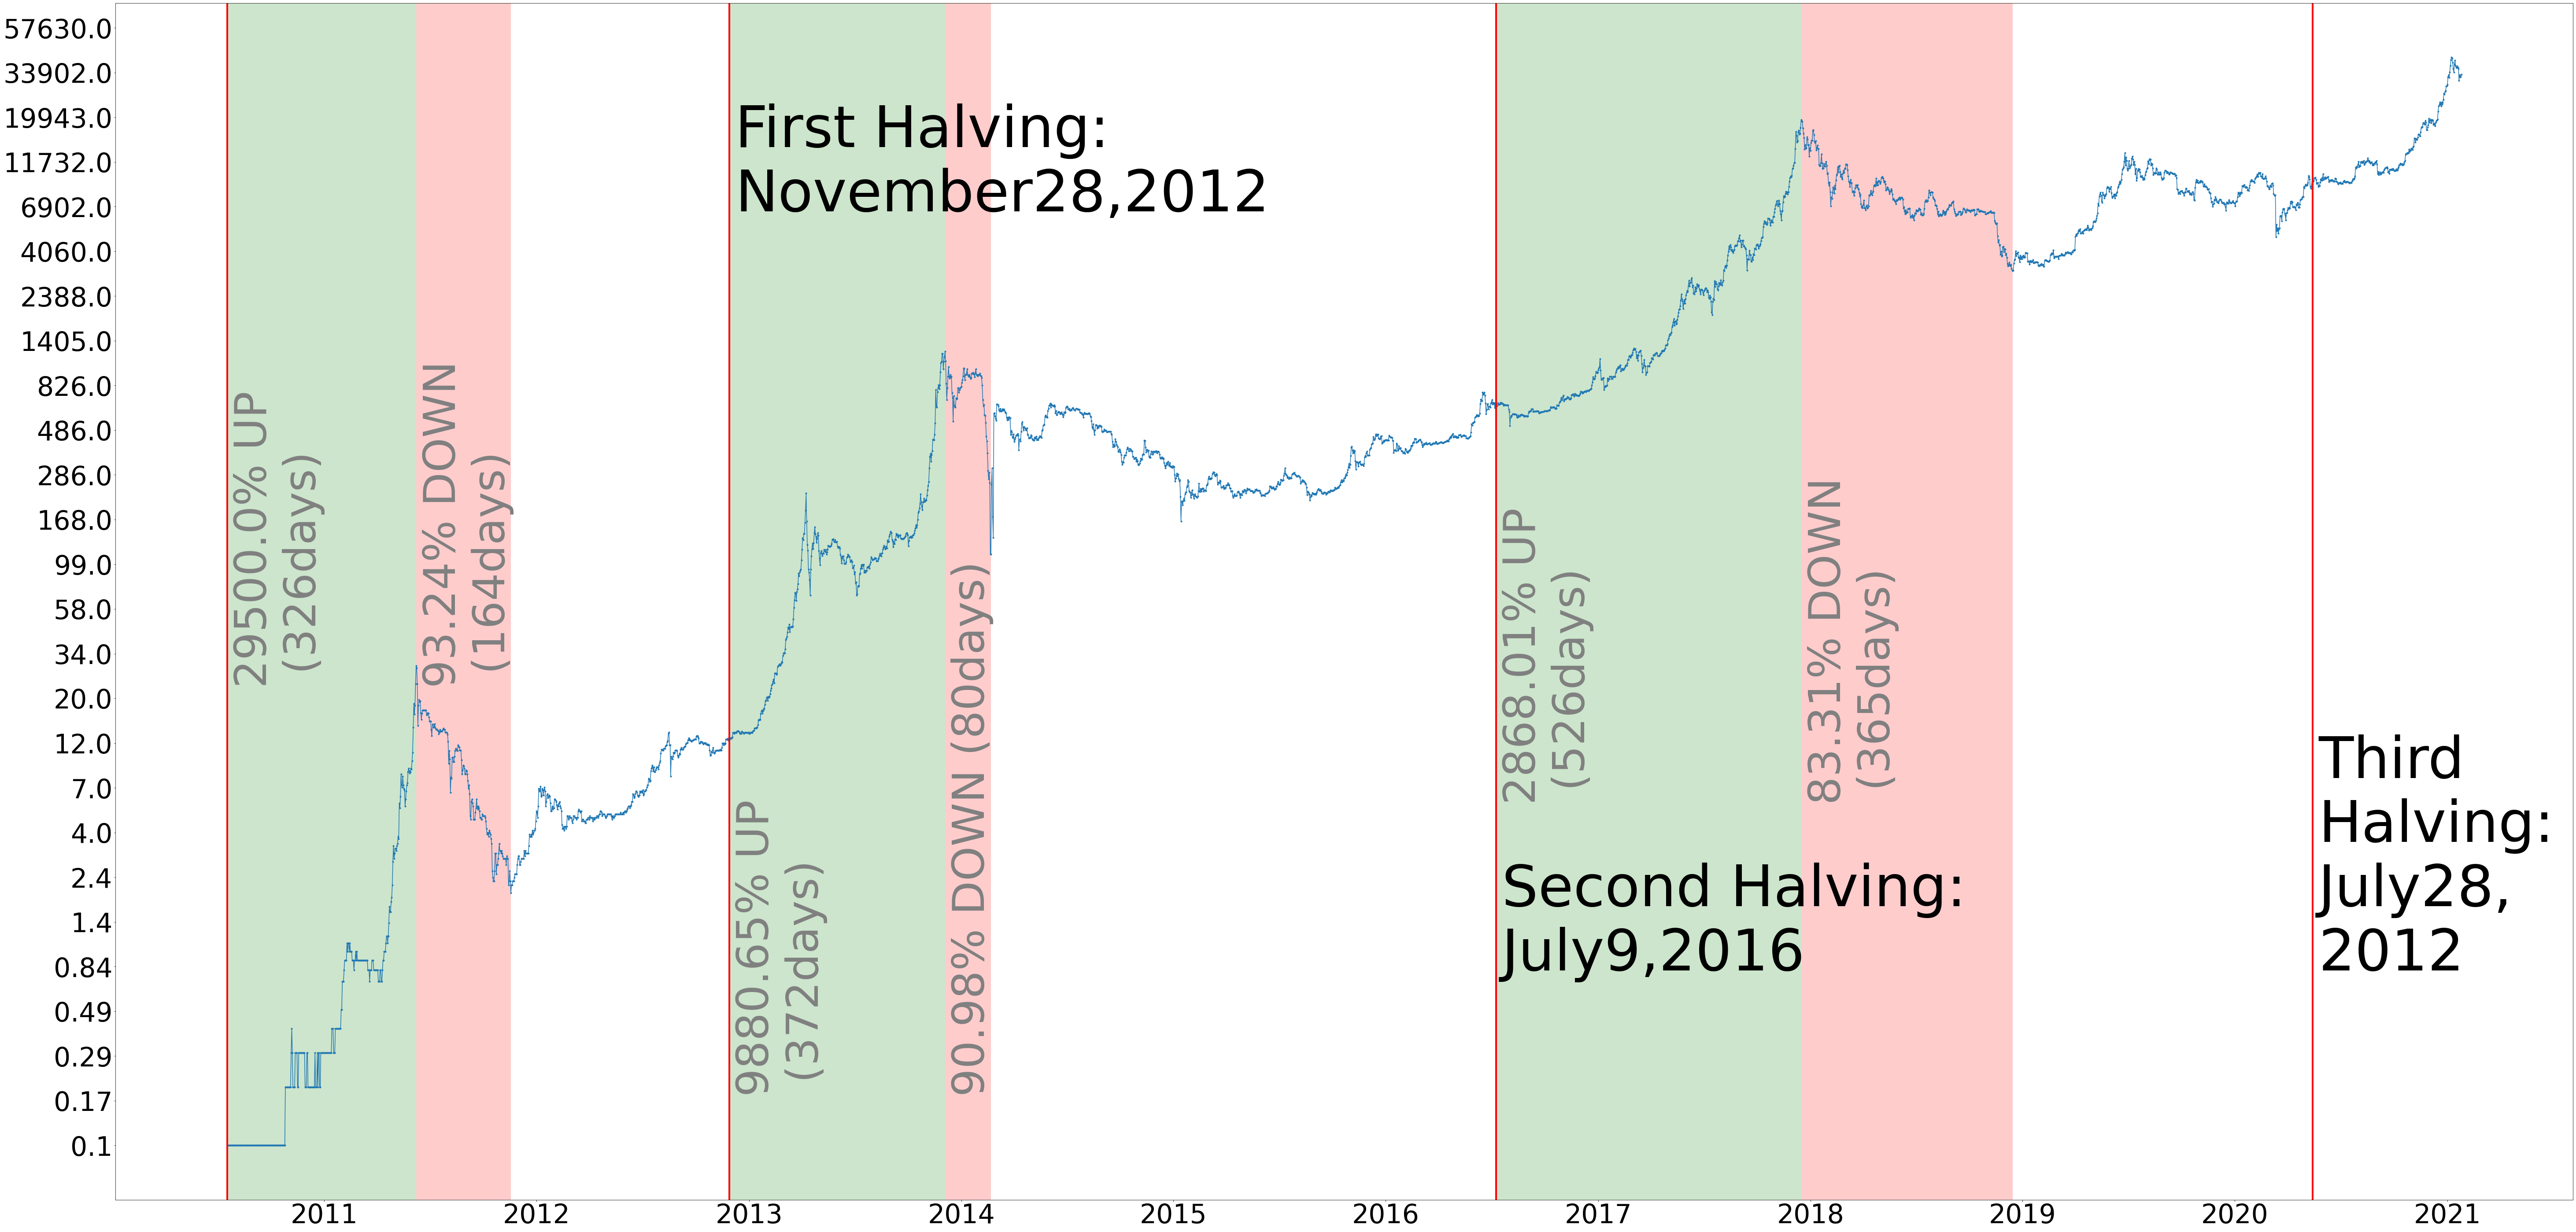

In [131]:
import datetime as dt

style = dict(rotation=90, size=100, color='gray')

plt.figure(figsize=(100,50))
plt.plot(df['log price'], marker=".")
#y=plt.yticks()
#x1,x2=plt.xticks()
plt.yticks(values, labels, fontsize=60)
plt.xticks(val, xlabels,fontsize=60)

#halves
plt.axvline(dt.datetime(2010, 7, 18),color='r', linewidth=4)
plt.axvline(dt.datetime(2012, 11, 28),color='r', linewidth=4)
plt.axvline(dt.datetime(2016, 7, 9),color='r', linewidth=4)
plt.axvline(dt.datetime(2020, 5, 14),color='r', linewidth=4)

#bull market
halve1=df[df.index<='2012-11-28']
max1=halve1[halve1['Price']==halve1['Price'].max()] 
upchange1=(100*(max1['Price'][0]-halve1['Price'][0])/halve1['Price'][0]).round(decimals=2)
plt.axvspan(dt.datetime(2010, 7, 18),dt.datetime(max1.index.year[0], max1.index.month[0], max1.index.day[0]), facecolor='g', alpha=0.2)
plt.text(dt.datetime(2010, 7, 28), 8,str(upchange1) + "% UP\n (" + str(halve1.loc[:max1.index.values[0]].shape[0]) + "days)", **style)


halve2=df.loc[(df.index >='2012-11-28') & (df.index<='2016-07-09')]
max2=halve2[halve2['Price']==halve2['Price'].max()]
upchange2=(100*(max2['Price'][0]-halve2['Price'][0])/halve2['Price'][0]).round(decimals=2)
plt.axvspan(dt.datetime(2012, 11, 28),dt.datetime(max2.index.year[0], max2.index.month[0], max2.index.day[0]), facecolor='g', alpha=0.2)
plt.text(dt.datetime(2012, 12, 8), 1,str(upchange2) + "% UP\n (" +str(halve2.loc[:max2.index.values[0]].shape[0]) + "days)" , **style)
plt.text(dt.datetime(2012, 12, 8),16,"First Halving:\n"+halve2.index[0].month_name()+str(halve2.index[0].day)+","+str(halve2.index[0].year),size=130)

halve3=df.loc[(df.index >= '2016-07-09') & (df.index<='2020-05-14')]
max3=halve3[halve3['Price']==halve3['Price'].max()]
upchange3=(100*(max3['Price'][0]-halve3['Price'][0])/halve3['Price'][0]).round(decimals=2)
plt.axvspan(dt.datetime(2016, 7, 9),dt.datetime(max3.index.year[0], max3.index.month[0], max3.index.day[0]), facecolor='g', alpha=0.2)
plt.text(dt.datetime(2016, 7, 19), 6,str(upchange3) + "% UP\n (" +str(halve3.loc[:max3.index.values[0]].shape[0]) + "days)" , **style)
plt.text(dt.datetime(2016, 7, 19),3,"Second Halving:\n"+halve3.index[0].month_name()+str(halve3.index[0].day)+","+str(halve3.index[0].year),size=130)

plt.text(dt.datetime(2020, 5, 24),3,"Third\nHalving:\n"+halve2.index[-1].month_name()+str(halve1.index[-1].day)+",\n"+str(halve1.index[-1].year),size=130)

# Bear Market
bearhalve1=halve1.loc[max1.index.values[0]:]
min1=bearhalve1[bearhalve1['Price']==bearhalve1['Price'].min()]
downchange1=abs((100*(min1['Price'][0]-bearhalve1['Price'][0])/bearhalve1['Price'][0]).round(decimals=2))
plt.axvspan(dt.datetime(bearhalve1.index.year[0], bearhalve1.index.month[0], bearhalve1.index.day[0]),dt.datetime(min1.index.year[0], min1.index.month[0], min1.index.day[0]), facecolor='r', alpha=0.2)
plt.text(dt.datetime(bearhalve1.index.year[0], bearhalve1.index.month[0], bearhalve1.index.day[10]), 8,str(downchange1) + "% DOWN\n (" +str(bearhalve1.loc[:min1.index.values[0]].shape[0]) + "days)" , **style)

bearhalve2=halve2.loc[max2.index.values[0]:]
min2=bearhalve2[bearhalve2['Price']==bearhalve2['Price'].min()]
downchange2=abs((100*(min2['Price'][0]-bearhalve2['Price'][0])/bearhalve2['Price'][0]).round(decimals=2))
plt.axvspan(dt.datetime(bearhalve2.index.year[0], bearhalve2.index.month[0], bearhalve2.index.day[0]),dt.datetime(min2.index.year[0], min2.index.month[0], min2.index.day[0]), facecolor='r', alpha=0.2)
plt.text(dt.datetime(bearhalve2.index.year[0], bearhalve2.index.month[0], bearhalve2.index.day[10]), 1,str(downchange2) + "% DOWN (" +str(bearhalve2.loc[:min2.index.values[0]].shape[0]) + "days)" , **style)

bearhalve3=halve3.loc[max3.index.values[0]:]
min3=bearhalve3[bearhalve3['Price']==bearhalve3['Price'].min()]
downchange3=abs((100*(min3['Price'][0]-bearhalve3['Price'][0])/bearhalve3['Price'][0]).round(decimals=2))
plt.axvspan(dt.datetime(bearhalve3.index.year[0], bearhalve3.index.month[0], bearhalve3.index.day[0]),dt.datetime(min3.index.year[0], min3.index.month[0], min3.index.day[0]), facecolor='r', alpha=0.2)
plt.text(dt.datetime(bearhalve3.index.year[0], bearhalve3.index.month[0], bearhalve3.index.day[10]), 6,str(downchange3) + "% DOWN\n (" +str(bearhalve3.loc[:min3.index.values[0]].shape[0]) + "days)" , **style)

plt.plot()
